# Example 11: Encouraging linearity

In cases where we don't know how deep we should set KANs to be, one strategy is to try from small models, grudually making models wider/deeper until we find the minimal model that performs the task quite well. Another strategy is to start from a big enough model and prune it down. This jupyter notebook demonstrates cases where we go for the second strategy. Besides sparsity along width, we also want activation functions to be linear ('shortcut' along depth).

There are two relevant tricks: 

(1) set the base function 'base_fun' to be linear; 

(2) penalize spline coefficients. When spline coefficients are zero, the activation function is linear.

$f(x)={\rm sin}(\pi x)$. Although we know a [1,1] KAN suffices, we suppose we don't know that and use a [1,1,1,1] KAN instead.

without trick

In [1]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create dataset f(x,y) = sin(pi*x). This task can be achieved by a [1,1] KAN
f = lambda x: torch.sin(torch.pi*x[:,[0]])
dataset = create_dataset(f, n_var=1, device=device)

model = KAN(width=[1,1,1,1], grid=5, k=3, seed=0, noise_scale=0.1, device=device)

model.fit(dataset, opt="LBFGS", steps=20);

cuda
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.74e-04 | test_loss: 3.84e-04 | reg: 8.88e+00 | : 100%|█| 20/20 [00:05<00:00,  3.79it

saving model version 0.1


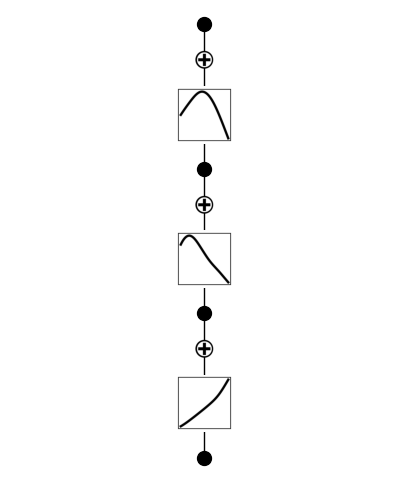

In [2]:
model.plot()

with tricks

In [3]:
from kan import *

# create dataset f(x,y) = sin(pi*x). This task can be achieved by a [1,1] KAN
f = lambda x: torch.sin(torch.pi*x[:,[0]])
dataset = create_dataset(f, n_var=1, device=device)

# set base_fun to be linear
model = KAN(width=[1,1,1,1], grid=5, k=3, seed=0, base_fun='identity', noise_scale=0.1, device=device)

# penality spline coefficients
model.fit(dataset, opt="LBFGS", steps=20, lamb=1e-4, lamb_coef=10.0);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.89e-03 | test_loss: 8.40e-03 | reg: 1.83e+01 | : 100%|█| 20/20 [00:04<00:00,  4.20it

saving model version 0.1


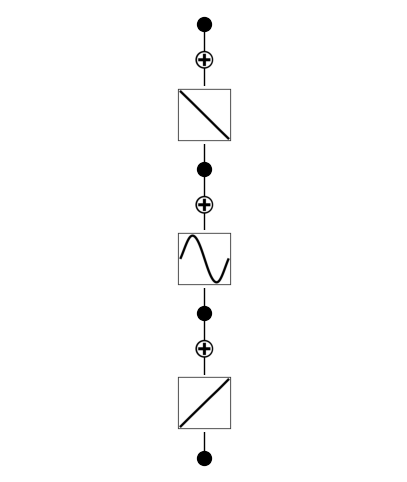

In [4]:
model.plot(beta=10)